# NPD Field data analysis and visualisation
## https://factpages.npd.no/en/field/tableview/overview
This notebook contains analysis and visualisations of the data available for export under the 'Field' tab at the link above.

The process is to specify a Company licensee and display the Fields they have an interest in. From this, the in place volumes and reserves of those fields, with totals, can be extracted and displayed.

There is also visualisations on number of Licensees and the number of fields they have an interest in, number of producing fields, breakdown of fields by area (North Sea, Norwegian Sea and Barents Sea).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_theme()
pd.options.display.max_rows = 500

In [2]:
# This list represents the data under the Field tab (plus one under the Company tab).
# The list items are used as keys to the links which are held in the load package.

fields = ['field_overview',
          'field_status',
          'field_operators',
          'field_owners',
          'field_licensees',
          'field_reserves',
          'field_inplaceVol',
          'field_description',
          'comp_reserves',
         ]

In [3]:
from load import load, calculate

# Field Licensees

In [4]:
licensees = load(fields[4])

In [5]:
# Current licences don't have a date in 'fldLicenseeTo' field.
curr_lic = licensees[licensees.fldLicenseeTo.isnull()]
data = curr_lic.cmpLongName.value_counts()

## Current Field Licensee Companies

In [6]:
# Select a company by the integer value to be used as input to the Company specific visualisations
licence_companies = list(enumerate(data.index, start=1))
print(licence_companies)
select = int(input("Select a company by associate number: "))
company = licence_companies[select-1][1]
print("*"*52)
print(f"Selected company is {company}")

[(1, 'Equinor Energy AS'), (2, 'Petoro AS'), (3, 'Vår Energi AS'), (4, 'Total E&P Norge AS'), (5, 'Wintershall Dea Norge AS'), (6, 'Aker BP ASA'), (7, 'ConocoPhillips Skandinavia AS'), (8, 'Neptune Energy Norge AS'), (9, 'Spirit Energy Norway AS'), (10, 'DNO Norge AS'), (11, 'LOTOS Exploration and Production Norge AS'), (12, 'Idemitsu Petroleum Norge AS'), (13, 'Repsol Norge AS'), (14, 'Lundin Energy Norway AS'), (15, 'PGNiG Upstream Norway AS'), (16, 'KUFPEC Norway AS'), (17, 'A/S Norske Shell'), (18, 'OMV (Norge) AS'), (19, 'OKEA ASA'), (20, 'INEOS E&P Norge AS'), (21, 'Wellesley Petroleum AS'), (22, 'Suncor Energy Norge AS'), (23, 'Repsol Sinopec North Sea Limited'), (24, 'DNO North Sea (ROGB) Limited'), (25, 'Sval Energi AS'), (26, 'Edison Norge AS'), (27, 'Petrolia NOCO AS'), (28, 'Repsol Sinopec Resources UK Limited'), (29, 'Mime Petroleum AS'), (30, 'Dana Petroleum (BVUK) Limited'), (31, 'Pandion Energy AS'), (32, 'CapeOmega AS'), (33, 'Equinor UK Limited'), (34, 'Chrysaor Norge

In [7]:
# Format label strings to only show first word in Company long name
labels = data.index
labelf = [f'{label.split()[0]}' for label in labels]

## Plot a list of all companies that have a current interest is Fields on the NCS

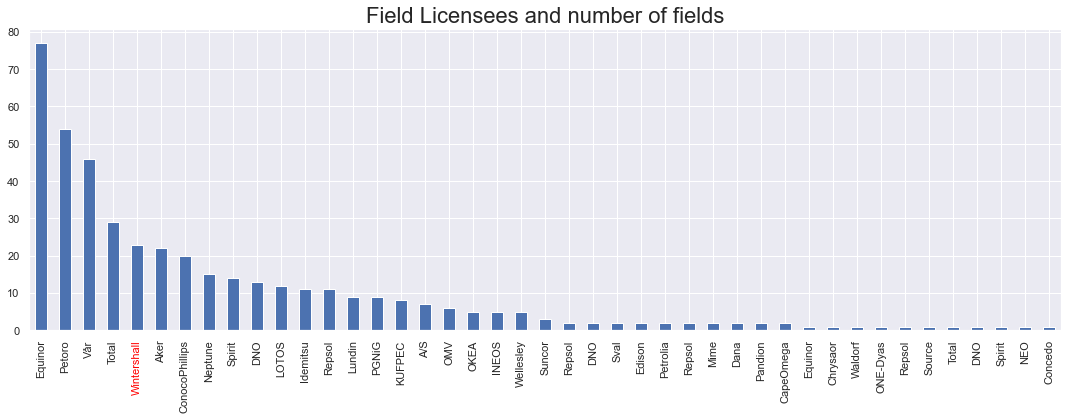

In [8]:
fig, ax = plt.subplots(figsize=(15, 6), tight_layout=True)
data.plot(kind='bar')
ax.xaxis.set_ticklabels(labelf)
plt.xticks(rotation=90); plt.title('Field Licensees and number of fields', fontsize=22)
plt.gca().get_xticklabels()[select-1].set_color('red')
plt.savefig('Field_licensees.png')
plt.show()

In [9]:
company_licences = licensees[licensees['cmpLongName']==company]
company_licences = company_licences.loc[company_licences.groupby('fldName').fldLicenseeFrom.idxmax(),:]

## Print the number of Fields that the selected company has an interest in

In [10]:
print(f"Number of Fields for {company}: {len(company_licences)}")

Number of Fields for Wintershall Dea Norge AS: 23


In [11]:
company_fields = company_licences['fldName']
company_fields

8531    AASTA HANSTEEN
235              BAUGE
386              BRAGE
960             DVALIN
1138      EDVARD GRIEG
2333              GJØA
3174              HYME
3256        IVAR AASEN
3488             KNARR
3725             MARIA
4129             NJORD
4404              NOVA
4985             SKARV
5221            SNORRE
5474           SNØHVIT
5554           SOLVEIG
5947     STATFJORD ØST
6238             SYGNA
6874            TORDIS
7502              VEGA
7580        VESLEFRIKK
7893            VIGDIS
8322            ÆRFUGL
Name: fldName, dtype: object

In [12]:
inplacevols = load(fields[6])

# In place volumes for specified Company

In [13]:
company_inplacevols = calculate(company_fields, inplacevols)
company_inplacevols.to_csv(index=False);

In [14]:
company_inplacevols

,fldName,fldInplaceOil,fldInplaceAssLiquid,fldInplaceAssGas,fldInplaceFreeGas,fldDateOffResEstDisplay,fldNpdidField
122,AASTA HANSTEEN,0.0,1.0,0.0,78.69,2019-12-31,23395946.0
5,BAUGE,20.0,0.0,6.0,0.00,2019-12-31,29446221.0
7,BRAGE,158.0,13.0,16.0,4.80,2019-12-31,43651.0
14,DVALIN,0.0,1.0,0.0,25.45,2019-12-31,29393934.0
16,EDVARD GRIEG,83.0,0.0,10.0,0.00,2019-12-31,21675433.0
30,GJØA,52.0,13.0,10.0,54.01,2019-12-31,4467574.0
44,HYME,6.0,0.0,1.0,0.00,2019-12-31,20474183.0
46,IVAR AASEN,47.0,0.0,7.0,2.36,2019-12-31,23384520.0
51,KNARR,32.0,0.0,4.0,0.00,2019-12-31,20460988.0
55,MARIA,37.0,0.0,6.0,0.00,2019-12-31,26465170.0


In [15]:
# Field reserves
reserves = load(fields[5])
# Field reserves at Company share ('fldCompanyShare')
reserves_comp = load(fields[-1]) 

# Reserves for each Field the specified company has an interest in

In [16]:
reserves_comp = reserves_comp[reserves_comp['cmpLongName']==company]
reserves_comp.drop(['cmpLongName', 'cmpDateOffResEstDisplay', 'fldNpdidField', 'cmpNpdidCompany'], axis=1, inplace=True)
reserves_comp.loc['Total'] = reserves_comp.sum(numeric_only=True, axis=0)
reserves_comp.to_csv(index=False)
reserves_comp

,fldName,cmpRemainingOil,cmpRemainingGas,cmpRemainingNGL,cmpRemainingCondensate,cmpRemainingOE,cmpShare
392,BAUGE,2.18,0.52,0.27,0.00,3.21,27.50000
393,BRAGE,1.07,0.11,0.03,0.00,1.24,35.20000
394,DVALIN,0.00,9.87,0.13,0.23,10.34,55.00000
395,EDVARD GRIEG,3.41,0.31,0.09,0.00,3.89,15.00000
396,GJØA,0.73,2.79,0.63,0.00,4.71,28.00000
397,HYME,0.36,0.15,0.06,0.00,0.62,27.50000
398,IVAR AASEN,1.00,0.15,0.03,0.00,1.20,6.46150
399,KNARR,0.51,0.01,0.02,0.00,0.56,30.00000
400,MARIA,3.49,0.30,0.18,0.00,4.12,50.00000
401,NJORD,2.42,6.76,1.92,0.00,12.82,50.00000


## Display total reserves for each field - not company share.

In [17]:
company_reserves = calculate(company_fields, reserves)
company_reserves.to_csv(index=False)
company_reserves

,fldName,fldRecoverableOil,fldRecoverableGas,fldRecoverableNGL,fldRecoverableCondensate,fldRecoverableOE,fldRemainingOil,fldRemainingGas,fldRemainingNGL,fldRemainingCondensate,fldRemainingOE,fldDateOffResEstDisplay,fldNpdidField
122,AASTA HANSTEEN,0.00,54.01,0.00,0.69,54.70,0.00,47.40,0.00,0.59,47.99,2019-12-31,23395946.0
5,BAUGE,7.94,1.88,0.97,0.00,11.66,7.94,1.88,0.97,0.00,11.66,2019-12-31,29446221.0
7,BRAGE,62.38,4.24,1.38,0.00,69.24,3.05,0.30,0.09,0.00,3.52,2019-12-31,43651.0
14,DVALIN,0.00,17.95,0.23,0.42,18.81,0.00,17.95,0.23,0.42,18.81,2019-12-31,29393934.0
16,EDVARD GRIEG,42.24,3.83,1.11,0.00,48.18,22.70,2.05,0.61,0.00,25.91,2019-12-31,21675433.0
30,GJØA,16.01,40.57,9.89,0.00,75.37,2.60,9.96,2.25,0.00,16.84,2019-12-31,4467574.0
44,HYME,3.15,0.86,0.30,0.00,4.58,1.30,0.56,0.20,0.00,2.24,2019-12-31,20474183.0
46,IVAR AASEN,23.67,4.04,0.68,0.00,29.00,15.45,2.38,0.40,0.00,18.59,2019-12-31,23384520.0
51,KNARR,9.87,0.36,0.59,0.00,11.35,1.71,0.03,0.06,0.00,1.85,2019-12-31,20460988.0
55,MARIA,8.56,0.76,0.45,0.00,10.18,6.98,0.60,0.35,0.00,8.25,2019-12-31,26465170.0


# Overview

In [18]:
overview = load(fields[0])

## Breakdown of all fields on the NCS

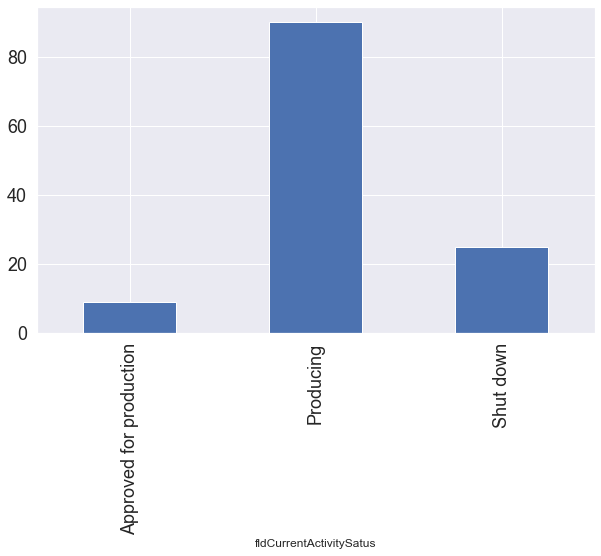

In [19]:
overview.groupby('fldCurrentActivitySatus').size().plot(kind='bar', figsize=(10,6), fontsize=18)
plt.savefig('All Fields.png'); plt.show()

In [20]:
producing_fields = overview[overview['fldCurrentActivitySatus']=='Producing']['cmpLongName'].value_counts()
producing_approved_fields = overview[overview['fldCurrentActivitySatus'].isin(['Approved for production'])]['cmpLongName'].value_counts()
shutdown_fields = overview[overview['fldCurrentActivitySatus']=="Shut down"]['cmpLongName'].value_counts()

print(f"Number of fields: {overview.shape[0]}")
print(f"Number of producing fields: {producing_fields.sum()}")
print(f"Number of producing and approved fields: {producing_approved_fields.sum()}")
print(f"Number of shut down fields: {shutdown_fields.sum()}") # doesn't include 3 NaN entries

Number of fields: 124
Number of producing fields: 90
Number of producing and approved fields: 9
Number of shut down fields: 22


## Status of Fields by Area

fldCurrentActivitySatus  Approved for production  Producing  Shut down
fldMainArea                                                           
Barents Sea                                  1.0        2.0        NaN
North Sea                                    6.0       67.0       24.0
Norwegian Sea                                2.0       21.0        1.0
Column Total                                 9.0       90.0       25.0


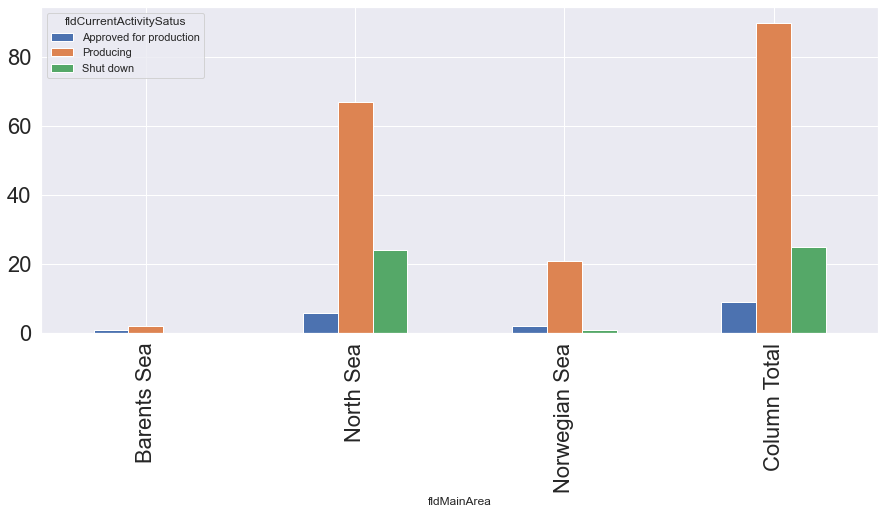

In [21]:
data = overview.groupby(['fldMainArea', 'fldCurrentActivitySatus']).size().unstack()
data.loc['Column Total'] = data.sum(numeric_only=True, axis=0)
print(data)
data.plot(kind='bar', figsize=(15,6), fontsize=22)
plt.savefig('Fields by Area.png'); plt.show()

# Backup

# Status

In [22]:
status = load(fields[1])

In [23]:
# status.head()

In [24]:
status.dropna(inplace=True)
status = status.loc[status.groupby('fldName').fldStatusToDate.idxmax(),:]

In [25]:
status['fldStatus'].value_counts()
#  the headings and values look transposed

Approved for production    91
Producing                  24
Shut down                   1
Name: fldStatus, dtype: int64

In [26]:
status['fldName'].nunique()

116

# Operators

In [27]:
operators = load(fields[2])

In [28]:
print(f" Number of Operators: {operators['cmpLongName'].nunique()}")
print(f" Number of Fields: {operators['fldName'].nunique()}")

 Number of Operators: 78
 Number of Fields: 124


In [29]:
# Current Operators don't have a date in the 'fldOperatorTo' field
operators[operators['fldOperatorTo'].isnull()]['cmpLongName'].value_counts() # 121 - doesn't include NaN

Equinor Energy AS                   59
Aker BP ASA                         19
ConocoPhillips Skandinavia AS        9
Wintershall Dea Norge AS             5
Vår Energi AS                        5
Repsol Norge AS                      4
A/S Norske Shell                     3
Neptune Energy Norge AS              3
Lundin Energy Norway AS              3
Spirit Energy Norway AS              2
DNO Norge AS                         2
Total E&P Norge AS                   2
OKEA ASA                             1
Chrysaor Norge AS                    1
Repsol Sinopec North Sea Limited     1
Petrogas NEO UK Ltd                  1
Total E&P UK Ltd                     1
Name: cmpLongName, dtype: int64

# Description

In [30]:
description = load(fields[7])

In [31]:
description.head()

,fldName,fldDescriptionHeading,fldDescriptionText,fldNpdidField,fldDescriptionDateUpdated
0,ALBUSKJELL,Development,Albuskjell is a field in the southern part of ...,43437,2020-02-08
1,ALBUSKJELL,Reservoir,Albuskjell produced gas and condensate from Ma...,43437,2018-03-16
2,ALBUSKJELL,Recovery,The field was produced by pressure depletion.,43437,2017-04-11
3,ALBUSKJELL,Transport,The well stream was transported via pipeline t...,43437,2018-03-16
4,ALBUSKJELL,Status,The field was shut down in 1998 and the platfo...,43437,2020-02-08
